In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# XGLM 1-1

def get_score(context_size, model):
    disk_dir = "/mnt/data-poseidon/sumire/thesis"
    #xglm_path = f'/1-1/en-{lang}/xglm-{lang}-1-1/test_score.txt'
    #llama_path = f'/1-1/en-{lang}/llama-{lang}-1-1/test_score.txt'

    lang_list = os.listdir(disk_dir + f"/{context_size}_withoutContext")
    for id, lang in enumerate(lang_list):
        lang_list[id] = lang_list[id].replace("en-", "")
    print (lang_list)

    lang_scores = {}

    #for model_path in [xglm_path, llama_path]:
    for lang in lang_list:
        score_path = disk_dir+f'/1-1_withoutContext/en-{lang}/{model}-{lang}-1-1/test_score.txt'
        if os.path.exists(score_path):
            with open(score_path,'r') as wf:
                lang_scores[lang] = wf.readlines()
                
        else:    
            lang_scores[lang] = ["bleu: 0", "comet: 0", "gen_len: 0"]
       
    #print (lang_scores) #str.replace("\n", "")

    # Sample data: replace this with your actual data
    bleu_list = []
    comet_list = []
    for score_list in lang_scores.values():
        bleu = score_list[0]
        bleu = bleu.replace("bleu: ", "")
        bleu = bleu.replace("\n", "")
        bleu = float(bleu)
        
        comet = score_list[1]
        comet = comet.replace("comet: ", "")
        comet = comet.replace("\n", "")
        comet = float(comet)
        bleu_list.append(bleu)
        comet_list.append(comet)
    return comet_list, bleu_list, lang_list


In [13]:
xglm_comet_list, xglm_bleu_list, lang_list = get_score("1-1","xglm")
print ("XGLM COMET", xglm_comet_list)
print ("\nXGLM BLEU", xglm_bleu_list)
llama_comet_list, llama_bleu_list, lang_list = get_score("1-1","llama")
print ("Llama COMET", llama_comet_list)
print ("\nLlama BLEU", llama_bleu_list)

['ar', 'fr', 'ja', 'ko', 'de', 'zh']
XGLM COMET [0.7424775510204092, 0.7066995569339832, 0.7422354316546771, 0.7178769919427032, 0.6735774628879874, 0.7360884135472355]

XGLM BLEU [5.739098935226258, 21.700270934869295, 7.176372302158279, 3.615564010743058, 14.435698155645545, 4.061217602495539]
['ar', 'fr', 'ja', 'ko', 'de', 'zh']
Llama COMET [0.49336076342654245, 0.6360132476739032, 0.580534532374101, 0.464838943598926, 0.6572588129496405, 0.6180093582887694]

Llama BLEU [2.0083327119396337, 20.113345192733714, 3.169303866906472, 1.0600735899731433, 17.565122841726623, 0.41023823529411774]


[0.49336076342654245, 0.6360132476739032, 0.580534532374101, 0.464838943598926, 0.6572588129496405, 0.6180093582887694]


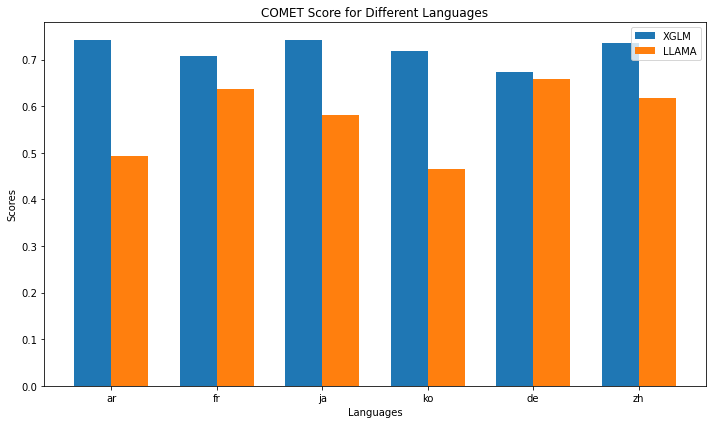

In [6]:
# Generating positions for the bars
x = np.arange(len(lang_list))  # The label locations
width = 0.35  # The width of the bars

# Creating the plot
fig, ax = plt.subplots(figsize=(10, len(lang_list)))
rects1 = ax.bar(x - width/2, xglm_comet_list, width, label='XGLM')
print (llama_comet_list)
rects2 = ax.bar(x + width/2, llama_comet_list, width, label='LLAMA')

# Adding labels and title
ax.set_xlabel('Languages')
ax.set_ylabel('Scores')
ax.set_title('COMET Score for Different Languages')
ax.set_xticks(x)
ax.set_xticklabels(lang_list)
ax.legend()

# Displaying the plot
plt.tight_layout()
plt.show()


[0.49336076342654245, 0.6360132476739032, 0.580534532374101, 0.464838943598926, 0.6572588129496405, 0.6180093582887694]


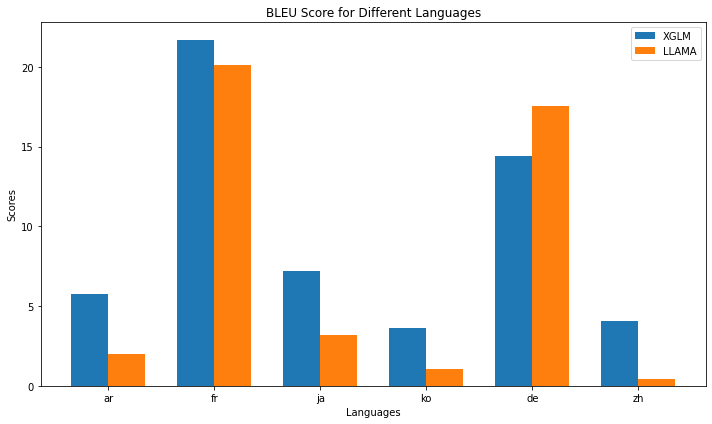

In [7]:
# Generating positions for the bars
x = np.arange(len(lang_list))  # The label locations
width = 0.35  # The width of the bars

# Creating the plot
fig, ax = plt.subplots(figsize=(10, len(lang_list)))
rects1 = ax.bar(x - width/2, xglm_bleu_list, width, label='XGLM')
print (llama_comet_list)
rects2 = ax.bar(x + width/2, llama_bleu_list, width, label='LLAMA')

# Adding labels and title
ax.set_xlabel('Languages')
ax.set_ylabel('Scores')
ax.set_title('BLEU Score for Different Languages')
ax.set_xticks(x)
ax.set_xticklabels(lang_list)
ax.legend()

# Displaying the plot
plt.tight_layout()
plt.show()